In [44]:
import numpy as np
import pandas as pd

%matplotlib inline

In [45]:
def Distances(x,y):
   """
   Compute the distance matrix for vector x and y
   Args:
    x:vector value for uploadid x 
    y:vector value for uploadid y
   Returns:
     distances: distance matrix of x and y
   """
   if len(y) > len(x):
      leny = len(y)
      lenx = len(x)
      xval = x
      yval = y
   elif len(x) > len(y):
      leny = len(x)
      lenx = len(y)
      xval = y
      yval = x
   elif len(y) == len(x):
      lenx = len(x)
      leny = len(y)
      xval = x
      yval = y
   distances= [[0] * lenx for i in range(leny)]
   for i in range(leny):  
     for j in range(lenx):   
         distances[i][j] = ((xval[j])-(yval[i]))**2
   return distances

In [46]:
def DiagonalList(dis):
   """
   Find the diagonal with the highest count of zero and the diagonal start index
   Args:
    dis: distance matrix
   Returns:
     diagonal: diagonal with higest count of zero
     diagonalStartIndex:Start Index of diagonal
   """
   matrix=np.array(dis)
   j=-len(dis)
   x=len(dis[0])+1
   highestCount=0
   for i in range(len(dis[0])-1,j,-1): 
       arr = matrix.diagonal(i)
       countZero = (arr == 0).sum()
       if countZero >= highestCount:
          highestCount = countZero
          diagonal=arr
          diagonalStartIndex=abs(i)
   return (diagonal,diagonalStartIndex)

In [47]:
def DiagonalZero(disMatrix,ts1,ts2,startindex):
   """
   Compute the diagonal Index with the highest count of zero (output from DiagonalList)
   Args:
    disMatrix: distance matrix
    ts1:Vector 1
    ts2:vector 2
    startindex: the start index for the diagonal
   Returns:
     dia.Index: diagonal Index
     dia.value: diagonal value
   """
   diaIndex=[]
   diaValue=[]
   if len(ts2) > len(ts1):
      leny = len(ts2)
      j = len(ts1)-1
   elif len(ts1) > len(ts2):
      leny = len(ts1)
      j = len(ts2)-1
   elif len(ts1) == len(ts2):
      lenx = len(ts1)
      leny = len(ts2)
      j = len(ts1)-1
   i = startindex
   k = 0
   while i < leny and k <= j:
       if disMatrix[i][k] >= 0:
          diaIndex += [[i,k]]
          diaValue += [disMatrix[i][k]]  
          k = k+1
          i = i+1  
   return (diaIndex,diaValue)

In [48]:
def zero_runs(diaValue): #https://stackoverflow.com/questions/24885092/finding-the-consecutive-zeros-in-a-numpy-array
   """
   Args:
   diaValue: diagonal values returned from function diagonalzero
   Returns:
    ranges: list of consecutive zero ranges in the diagonal
   """
   iszero = np.concatenate(([0], np.equal(diaValue, 0).view(np.int8), [0]))
   absdiff = np.abs(np.diff(iszero))
   ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
   return ranges

In [49]:
def CountZero(runs):
   """
   Args:
    runs: list of start and stop index of the consecutive zeros in an array
   Returns:
    totalCount:returns the count of consecutive zero
    countIndex:list index with max zeros
   """
   maxcount=0
   for i in  range(len(runs)):
        count=runs[i][1]-runs[i][0]
        if count>=maxcount:
            maxcount=count
            countIndex=i
   totalCount=maxcount
   return (totalCount,countIndex)

In [50]:
def ZeroIndex(runs,dia,runindex):
    """
   #accumulate indexes  
    Args:
      dia:diagonal indexes returned from function DiagonalZero
      runs:start and stop indexes
   Results:
     indexlst: list of indexes
    """
    i=runs[0]
    j=runs[1]
    indexlst=[]
    for i in range(i,j):
       indexlst+=[dia[i]]
    return indexlst

In [51]:
def DupIndex(x,y,indexzero):
    """
    Args:
    x & y : vectors
    indexzero:Output from function zeroindex
    Result:
     xindex& yindex:matrix indexes for vector x and y
     ts1dup &ts2dup: duplicated values
    """
    yvalue=[]
    xvalue=[]
    xdup=[]
    ydup=[]
    if len(y)>len(x):
       yval=y
       xval=x
    elif len(x)>len(y):
      xval=y
      yval=x
    elif len(y)==len(x):
      xval=x
      yval=y
    for i in range(len(indexzero)):
       yvalue+=[indexzero[i][0]]
    yindex=yvalue
    for i in range(len(indexzero)):
       xvalue+=[indexzero[i][1]]
    xindex=xvalue
    for i in range(len(xindex)):
        val=xindex[i]
        xdup+=[xval[val]] 
    ts1dup=xdup
    ts1dup.reverse()
    for i in range(len(yindex)):
        val=yindex[i]
        ydup+=[yval[val]]
    ts2dup=ydup
    ts2dup.reverse()
    return(xindex,yindex,ts1dup,ts2dup)

In [52]:
def lookupdict(x):
   """
   Args:
     x: vector
   Returns:
     indexDict: a dictionary holding the original indexes of vector
   """
   indexDict={}
   for i in range(len(x)):
       indexDict[i]=x[i]
   return indexDict

In [53]:
def ExtracteIndex(xDict,yDict,xIndex,yIndex):
   """
   Args:
      xDict & yDict: dictionary from function lookupdict
      xIndex $ yIndex: line up indexes
   Returns:
    xIndexList,yIndexList: a list of original duplicate indexes
   """
   xIndexList=[]
   yIndexList=[]
   if len(yIndex) > len(xIndex):
      y=yIndex
      x=xIndex
   elif len(xIndex)>len(yIndex):
      y=xIndex
      x=yIndex
     # x.Dict=x
   elif len(xIndex)==len(yIndex):
      y=yIndex
      x=xIndex
   if len(yDict)>len(xDict):
      xdict=xDict
      ydict=yDict
   elif len(xDict)> len(yDict):
       xdict=yDict
       ydict=xDict
   elif len(xDict)==len(yDict):
      xdict=xDict
      ydict=yDict
   for i in xIndex:
        xIndexList+=[xdict[i]]
   for i in yIndex:
        yIndexList+=[ydict[i]]
   xIndexList.reverse()
   yIndexList.reverse()
   return (xIndexList,yIndexList)

In [54]:
import time
start_time = time.time()

In [60]:
data = pd.read_csv("/Users/BlauBear/Documents/Tidepool/data-analytics/dedupe/data/0ab293f2e1cc4141cd10bfbd5d51664992b1c63c79ac45e548417154e4ecde43.csv",delimiter=',')
unique_ids = data['uploadId'].unique()
for i in unique_ids:
    i = data.loc[data['uploadId'] == i, ['time','value']]
# df1 = data.loc[data['uploadId'] == unique_ids[1], ['time','value']]
# df2 = data.loc[data['uploadId'] == unique_ids[2], ['time','value']]

In [34]:
# creating array of values 
ts1=np.array(df1['value'])
ts2=np.array(df2['value'])

--------------vector one and two--------------------------


In [62]:
print ("--------------original index for vector one and two--------------------------------------")
ts1index= df1.index
print ("-----------------")
print (ts1index)

--------------original index for vector one and two--------------------------------------
-----------------
Int64Index([4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973,
            ...
            5265, 5266, 5267, 5268, 5269, 5270, 5271, 5272, 5273, 5274],
           dtype='int64', length=311)


In [36]:
ts2index=df2.index
#print ts2index

print ("--------------------distance matrix---------------------")
dis = Distances(ts1,ts2)
# print (dis)

print ("----------------list of diagonals ---------------------------------------------")
arr,index=DiagonalList(dis)
startindex=index
zeroarr=arr
print (startindex)
# print (zeroarr)

--------------------distance matrix---------------------
----------------list of diagonals ---------------------------------------------
86


In [37]:
print ("---------------diagonal index with zero---------------------------------------")
diaindex,diaval= DiagonalZero(dis,ts1,ts2,startindex)
diavals=diaval
diaindexes=diaindex
#print diavals
#print diaindexes9

---------------diagonal index with zero---------------------------------------


In [38]:
runs=zero_runs(diavals)

print ("---list of indexes---")
print (runs)

---list of indexes---
[[  0   1]
 [ 26  28]
 [ 51  52]
 [115 116]]


In [39]:
print ("----maximum count of zero-------------------------------------")
sumzero,i=CountZero(runs)
sumindex=i
#print sumindex
maxruns=runs[sumindex]
#print maxruns
zeroruns=sumzero
#print zeroruns
print ("*******************")
######
diazero=ZeroIndex(maxruns,diaindexes,sumindex)
####

xindex2,yindex2,ts1value,ts2value=DupIndex(ts1,ts2,diazero)
######
xindex=xindex2
yindex=yindex2
duplicatedts1=ts1value
duplicatedts2=ts2value

print (duplicatedts1)
print ("-----------------------dup1------------------------------------------------------")
print (duplicatedts2)

----maximum count of zero-------------------------------------
*******************
[9.38076410486695, 9.269749145046038]
-----------------------dup1------------------------------------------------------
[9.38076410486695, 9.269749145046038]


In [43]:
print ("-----------dictionary for original index--------------------------------------------------")  
originalindexts1=lookupdict(ts1index)
originalindexts2=lookupdict(ts2index)

-----------dictionary for original index--------------------------------------------------
{0: 4964, 1: 4965, 2: 4966, 3: 4967, 4: 4968, 5: 4969, 6: 4970, 7: 4971, 8: 4972, 9: 4973, 10: 4974, 11: 4975, 12: 4976, 13: 4977, 14: 4978, 15: 4979, 16: 4980, 17: 4981, 18: 4982, 19: 4983, 20: 4984, 21: 4985, 22: 4986, 23: 4987, 24: 4988, 25: 4989, 26: 4990, 27: 4991, 28: 4992, 29: 4993, 30: 4994, 31: 4995, 32: 4996, 33: 4997, 34: 4998, 35: 4999, 36: 5000, 37: 5001, 38: 5002, 39: 5003, 40: 5004, 41: 5005, 42: 5006, 43: 5007, 44: 5008, 45: 5009, 46: 5010, 47: 5011, 48: 5012, 49: 5013, 50: 5014, 51: 5015, 52: 5016, 53: 5017, 54: 5018, 55: 5019, 56: 5020, 57: 5021, 58: 5022, 59: 5023, 60: 5024, 61: 5025, 62: 5026, 63: 5027, 64: 5028, 65: 5029, 66: 5030, 67: 5031, 68: 5032, 69: 5033, 70: 5034, 71: 5035, 72: 5036, 73: 5037, 74: 5038, 75: 5039, 76: 5040, 77: 5041, 78: 5042, 79: 5043, 80: 5044, 81: 5045, 82: 5046, 83: 5047, 84: 5048, 85: 5049, 86: 5050, 87: 5051, 88: 5052, 89: 5053, 90: 5054, 91: 5055

In [41]:
print ("--------------match to original index-------------------------")
print (ExtracteIndex(originalindexts1,originalindexts2,xindex,yindex)) 

print (time.time() - start_time, "seconds")

--------------match to original index-------------------------
([5302, 5301], [5077, 5076])
4.014014005661011 seconds


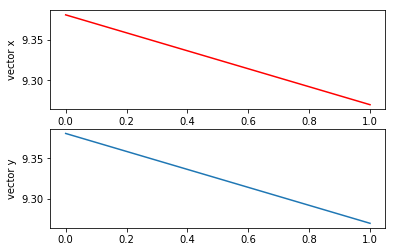

In [42]:
##
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(duplicatedts1,'r-')
plt.ylabel('vector x')
plt.subplot(2, 1, 2)
plt.plot(duplicatedts2)
plt.ylabel('vector y')

plt.show()